In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

data = pd.read_excel('../Adatok/tisztitott_adat.xlsx', index_col=0)
data_bull = data[data.label ==  1]
data_bear = data[data.label == -1]

value = lambda a : a[1]

## Gyakori szavak szófelhője növekvő árfolyam esetén

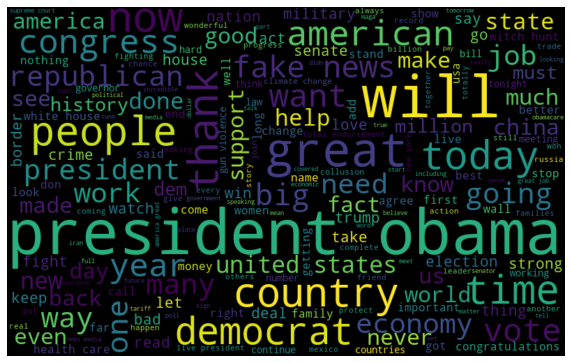

In [2]:
bull_words = ''
for i in range(len(data_bull)):
        bull_words += re.sub('\#\w+','',data_bull['text'].iloc[i])+' '
            
bull_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(bull_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(bull_wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

## Gyakori szavak szófelhője csökkenő árfolyam esetén

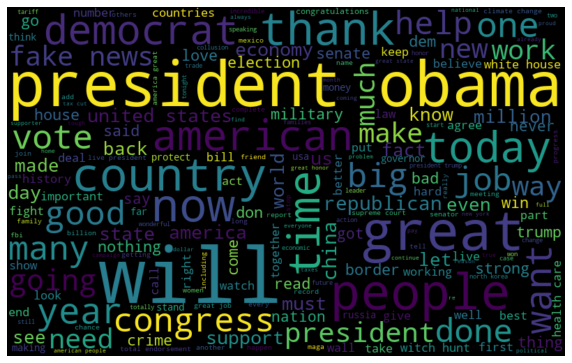

In [3]:
bear_words = ''
for i in range(len(data_bear)):
        bear_words += re.sub('\#\w+','',data_bear['text'].iloc[i])+' '
            
bear_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(bear_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(bear_wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

## Gyakori hashtagek növekvő árfolyam esetén

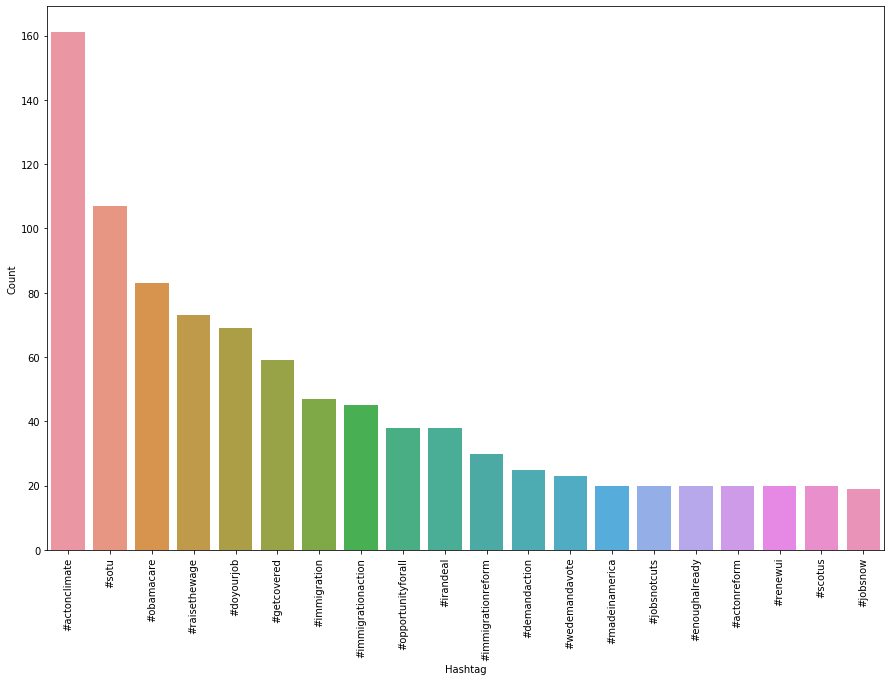

In [4]:
data_bull_hash = []
for i in range(len(data_bull)):
        temp_list = re.findall('\#\w+',data_bull['text'].iloc[i])
        for j in temp_list:
            data_bull_hash.append(j)
data_bull_hash_dict = {}
for i in data_bull_hash:
    if i in data_bull_hash_dict:
        data_bull_hash_dict[i] +=1
    else:
        data_bull_hash_dict[i] = 1

data_bull_hash_sorted = sorted(((k, v) for k, v in data_bull_hash_dict.items()), key = value, reverse= True)
data_bull_hash_sorted = pd.DataFrame(data_bull_hash_sorted[0:20],columns =['Hashtag', 'Count'])

plt.figure(figsize=(15,10))
ax = sns.barplot(data=data_bull_hash_sorted, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

## Gyakori hashtagek csökkenő árfolyam esetén

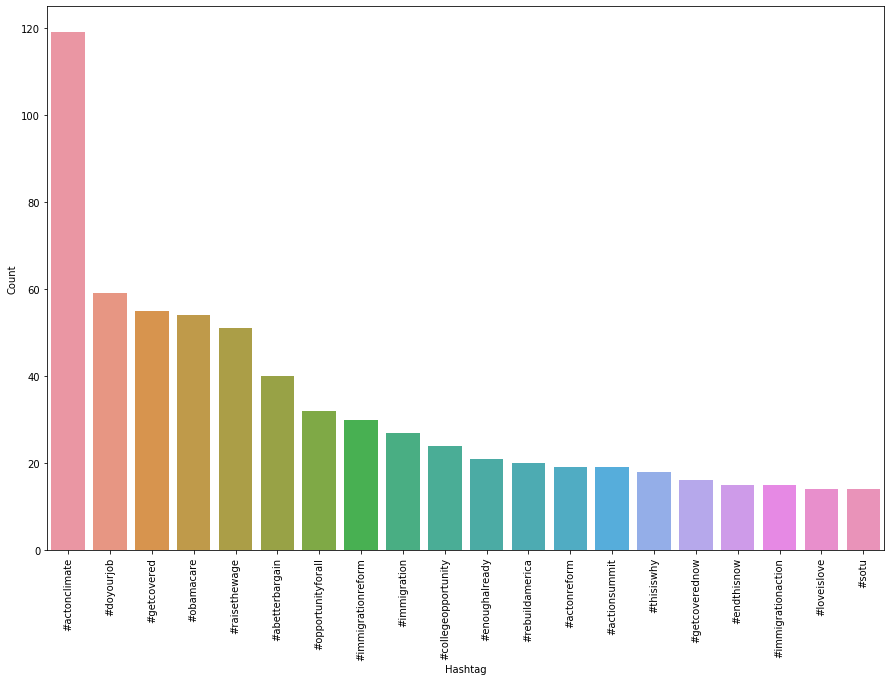

In [5]:
data_bear_hash = []
for i in range(len(data_bear)):
        temp_list = re.findall('\#\w+',data_bear['text'].iloc[i])
        for j in temp_list:
            data_bear_hash.append(j)
data_bear_hash_dict = {}
for i in data_bear_hash:
    if i in data_bear_hash_dict:
        data_bear_hash_dict[i] +=1
    else:
        data_bear_hash_dict[i] = 1

data_bear_hash_sorted = sorted(((k, v) for k, v in data_bear_hash_dict.items()), key = value, reverse= True)
data_bear_hash_sorted = pd.DataFrame(data_bear_hash_sorted[0:20],columns =['Hashtag', 'Count'])

plt.figure(figsize=(15,10))
bx = sns.barplot(data=data_bear_hash_sorted, x= "Hashtag", y = "Count")
bx.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()